In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file = ""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)
        print(file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.cluster import KMeans

### helper variables


In [ ]:
age_key = "Age"
spending_key = "Spending Score (1-100)"
income_key = "Annual Income (k$)"
gender_key = "Gender"


In [ ]:
df = pd.read_csv(file)

In [ ]:
x, y = df.shape
nl = df.isnull().sum()
print(f"there are {x} rows and {y} columns")

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

## Exploring data

### Distributions of numeric features

In [ ]:
plt.figure(figsize=(12, 4))

# create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# plot 1: age distribution
sns.histplot(df[age_key], kde=True, color='b', ax=axes[0], bins=26)
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# plot 2: Annual income distribution
sns.histplot(df[income_key], kde=True, color='b', ax=axes[1], bins=14)
axes[1].set_title("Annual Income distribution")
axes[1].set_xlabel("Annual Income")
axes[1].set_ylabel("Count")

# plot 3: Spending Score distribution
sns.histplot(df[spending_key], kde=True, color='b', ax=axes[2], bins=20)
axes[2].set_title("Spending Score distribution")
axes[2].set_xlabel("Spending Score")
axes[2].set_ylabel("Count")

plt.show()

### **Insights**:

**1. Age**
- Most customers are around ages 20-40
- there are less customers above 50
- the mall primarily attracts young to middle aged customers with a peak around 30 years old


**2. Annual Income**
- Annual income is skewed highly to the left
- Most customers have income below 80k
- there are less customers above 80k and below 40k
- therefore mall attracts customers with middle income

**3. Spending Score**
- Spending score is spread across 
- There are many customers at both peaks, and in the middle. 
- Most customers either spend very much, or very high, or right in the middle.

## Relationships between features

### 1. Numerical vs Numerical 

In [ ]:
# set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
# 3 rows, 1 column

# scatter plot for age vs spending score
sns.scatterplot(x= age_key,y = spending_key, hue=gender_key, data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Age vs Spending Score')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Spending Score')

# scatter plot for Annual Income vs Spending Sore
sns.scatterplot(x= income_key,y = spending_key, hue=gender_key, data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Annual Income vs Spending Score')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Spending Score')

# scatter plot for Age vs Annual Income 
sns.scatterplot(x= age_key,y = income_key, hue=gender_key, data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Age vs Annual Income')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income')

# adjust layout to avoid overlap
plt.tight_layout()

plt.show()

### **Insights**

- Spending score vs Annual Income shows possibility of clusters
- the plot with respect to gender doesn't seem to have impact on the clusters

therefore we will drop the gender feature.

In [ ]:
df = df.drop([gender_key])

### 2. 3d plot of important features

In [38]:
f = go.Figure(data=[
    go.Scatter3d(
        x=df[age_key],
        y=df[income_key],
        z=df[spending_key],
        mode='markers',
        marker=dict(
            size=4,
            opacity=0.75,
        )
    )
])

f.update_layout(
    scene=dict(
        xaxis_title=age_key,
        yaxis_title=income_key,
        zaxis_title=spending_key,
    ),
    title='3d plot'
)

f.show()

## Clustering using k-means

### 1. choose number of clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

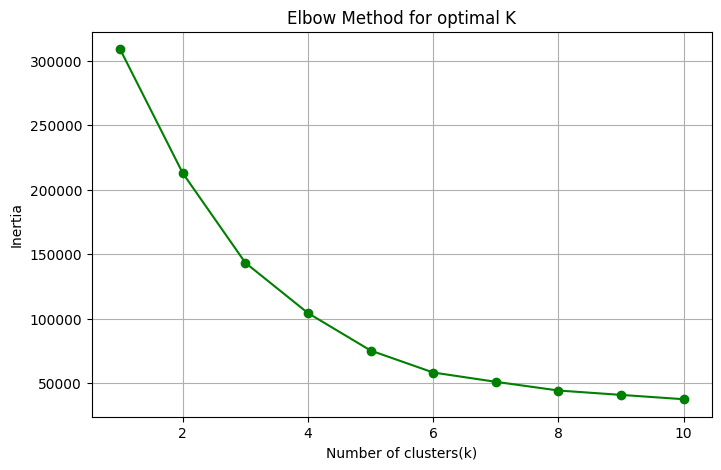

In [39]:
k_vals = range(1, 11)
inertia_vals = []

# calculate inertia for k
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[[age_key, income_key, spending_key]])
    inertia_vals.append(kmeans.inertia_)
    

# plot the inertia values against k
plt.figure(figsize=(8, 5))
plt.plot(k_vals, inertia_vals, marker='o', color='g')
plt.title("Elbow Method for optimal K", color='black')
plt.xlabel('Number of clusters(k)', color='black')
plt.ylabel('Inertia', color='black')
plt.grid(True)
plt.show()

choose k=6

### Clustering at k=6


In [42]:
df_k6 = df.copy(deep=True)

# apply kmeans with k=6
kmeans = KMeans(n_clusters=6, random_state=0)
df_k6['Cluster'] = kmeans.fit_predict(df[[age_key, income_key, spending_key]])

df_k6.sample(6)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
12,13,Female,58,20,15,5
92,93,Male,48,60,49,1
55,56,Male,47,43,41,1
189,190,Female,36,103,85,3
8,9,Male,64,19,3,5
147,148,Female,32,77,74,3


### Plot the clusters

In [46]:
fig = go.Figure()

# define colors
colors= ['red', 'blue', 'orange', 'black', 'purple', 'green']

# add data for each cluster
for cl in range(6):
    clustered_data = df_k6[df_k6['Cluster'] == cl]
    
    fig.add_trace(
        go.Scatter3d(
            x=clustered_data[age_key],
            y=clustered_data[income_key],
            z=clustered_data[spending_key],
            mode='markers',
            marker=dict(
                size=5,
                color=colors[cl],
                opacity=0.72,
            ),
            name=f"Cluster {cl + 1}"
        )
    )
    
fig.update_layout(
    scene=dict(
        xaxis_title=age_key,
        yaxis_title=income_key,
        zaxis_title=spending_key,
    ),
    title="3d interactive plot of clusters"
)